# Stochastic Methods - Assignment 6

# Statistical Methods, Final Assignment

Università della Svizzera italiana

**Due Date: 06/25/2024**

This assignment is to be completed using a Jupyter Notebook. Your code, figures, and analyses should be documented clearly within the notebook.

## Simulation and Learning
You will use stochastic methods to simulate evolutionary processes and train systems that learn from these simulations. You have two alternatives to choose from:

- Augmenting evolutionary trees and then training a Generalized Additive Model (GAM)
- Simulating full evolutionary trees and then training a Neural Network (NN)

Additionally, you will select one of the following species diversification models for your simulations:

- BiSSE (Binary State Speciation and Extinction)
- MuSSE (Multiple State Speciation and Extinction)
- QuaSSE (Quantitative State Speciation and Extinction)
- GeoSSE (Geographic State Speciation and Extinction)
- BiSSEness (BiSSE-Node Enhanced State Shift)
- ClaSSE (Cladogenetic State Speciation and Extinction)
- Diversity-Dependent Model formulated as: 

  $\lambda_t = \max\{(\lambda_0 - \beta N N_t), 0\}$

### Choose one of the following approaches:

#### Option 1: Augmenting Trees and Training a GAM
In this approach, you will extend the evolutionary trees generated in the previous assignment with additional simulated data to train a Generalized Additive Model (GAM). The GAM will be used to predict the likelihood function as a function of the model parameters. Follow these steps:

1. Select one of the species diversification models listed above. Describe the chosen model in detail, including the dynamics and the probabilities involved in the process.
2. Simulate additional evolutionary trees by varying the parameters according to the parameter grid specific to the chosen model.
3. Choose one of those simulated trees. Use the simulated trees to augment the dataset, as in the previous assignment.
4. Estimate the joint probability as done in the previous assignment, for different sets of parameters.
5. Train a GAM using the augmented dataset to predict the likelihood function based on the parameters.
6. Implement Differential Evolution (DE) or Stochastic Gradient Descent (SGD) to optimize the GAM and retrieve the appropriate parameters of the tree.
7. Evaluate the performance of the GAM by comparing its predictions to the known rates used in the simulations.

#### Option 2: Simulating Full Trees and Training a NN
In this approach, you will simulate entire evolutionary trees and use them to train a Neural Network (NN). Follow these steps:

1. Select one of the species diversification models listed above. Describe the chosen model in detail, including the dynamics and the probabilities involved in the process.
2. Simulate a diverse set of full evolutionary trees with varying parameters according to the parameter grid specific to the chosen model.
3. Encode the trees in a suitable format for neural network input (e.g., summary statistics, lineage through time plots).
4. Split the dataset into training, validation, and test sets.
5. Design and train a Neural Network to predict the parameters from the encoded trees.
6. Evaluate the NN’s performance on the test set by comparing predicted parameters to the true parameters used in the simulations.
7. Comment your results.

### Comparative Analysis for Advanced Students
For advanced students who want to explore both approaches, perform a comparative analysis:

1. Compare the predictive accuracy of the GAM and NN models.
2. Discuss the computational efficiency and scalability of each method.
3. Analyze the strengths and weaknesses of each approach.

## Appendix: Detailed Description of Species Diversification Models

### BiSSE (Binary State Speciation and Extinction)
**Dynamics:** The BiSSE model integrates the constant-rate birth-death process with a two-state Markov model, allowing species to exist in one of two states. Speciation ($\lambda_1, \lambda_2$), extinction ($\mu_1, \mu_2$), and transition rates ($q_{12}, q_{21}$) between states are constant over time.

**Parameters:**

- Speciation rates: $\lambda_1, \lambda_2$
- Extinction rates: $\mu_1, \mu_2$
- Transition rates: $q_{12}, q_{21}$

### MuSSE (Multiple State Speciation and Extinction)
**Dynamics:** The MuSSE model generalizes BiSSE to multiple states, allowing for the analysis of traits with more than two discrete states. Each state has its own speciation and extinction rates, and transition probabilities between states.

**Parameters:**

- Speciation rates: $\lambda_i$ where $i = 1, ..., K$
- Extinction rates: $\mu_i$ where $i = 1, ..., K$
- Transition rates: $q_{ij}$ where $i, j = 1, ..., K; i \ne j$

### QuaSSE (Quantitative State Speciation and Extinction)
**Dynamics:** The QuaSSE model allows speciation and extinction rates to vary as continuous functions of a quantitative trait. This model uses trait values that change gradually over time, as opposed to discrete states.

**Parameters:**

- Speciation rate function: $\lambda(x)$
- Extinction rate function: $\mu(x)$
- Trait evolution model: typically modeled as a Brownian motion with a drift parameter.

### GeoSSE (Geographic State Speciation and Extinction)
**Dynamics:** The GeoSSE model combines geographic range dynamics with speciation and extinction processes. Species can occupy region A, region B, or both (AB), and speciation can occur within a region or between regions.

**Parameters:**

- Speciation rates within regions: $s_A, s_B$
- Speciation rate between regions: $s_{AB}$
- Extinction rates: $x_A, x_B$
- Dispersal rates: $d_A, d_B$

### BiSSEness (BiSSE-Node Enhanced State Shift)
**Dynamics:** BiSSEness enhances the BiSSE model by incorporating state shifts during speciation events. It differentiates between changes occurring along lineages (anagenetic) and those occurring during speciation events (cladogenetic).

**Parameters:**

- Speciation rates: $\lambda_0, \lambda_1$
- Extinction rates: $\mu_0, \mu_1$
- Transition rates: $q_{12}, q_{21}$
- Cladogenetic shift probabilities: $p_{0c}, p_{1c}$
- Anagenetic shift probabilities: $p_{0a}, $p_{1a}$

### ClaSSE (Cladogenetic State Speciation and Extinction)
**Dynamics:** ClaSSE distinguishes between anagenetic evolution, which occurs within a lineage, and cladogenetic evolution, which occurs at speciation events. It models the rates of these processes based on character states.

**Parameters:**

- Cladogenesis rates: $\lambda_{klm}$ where $k, l, m$ represent different character states
- Extinction rates: $\mu_k$ for character state $k$
- Transition rates: $q_{lm}$ from state $l$ to $m$


<hr/>

The diversification model that i've choosen is the BiSSE, where the dynamics are described as follows:

We have two states, 0 and 1, where each branch can transition from one state to another, and by doing so the speciation and extinction rates can change. The speciation rates are $\lambda_0$ and $\lambda_1$, the extinction rates are $\mu_0$ and $\mu_1$, and the transition rates are $q_{01}$ and $q_{10}$.

For this assignment we will simulate full evolutionary trees and train a **Neural Network** to predict the parameters from the encoded trees.
First, we'll design our simulation algorithm:


The tree initially starts in a default state with a time limit T. At each time step, we track the number of herbivores and carnivores. For each time step, we calculate the probability of three possible events: speciation, extinction, or transition.

- Speciation Event: If this occurs, we create two new branches with the same state as the parent branch.
- Extinction Event: If this occurs, we remove the branch from the tree.
- Transition Event: If this occurs, we change the state of the branch, adjusting the counts of herbivores and carnivores accordingly.

To simplify tracking, we compute the probabilities of herbivores/total and carnivores/total for these events, indicating the likelihood of speciation or extinction happening in branches with these states.

This process is repeated until the time limit is reached, at which point we return the final counts of herbivores and carnivores.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Number of hervivores (state 1): 10
Number of carnivores (state 2): 772


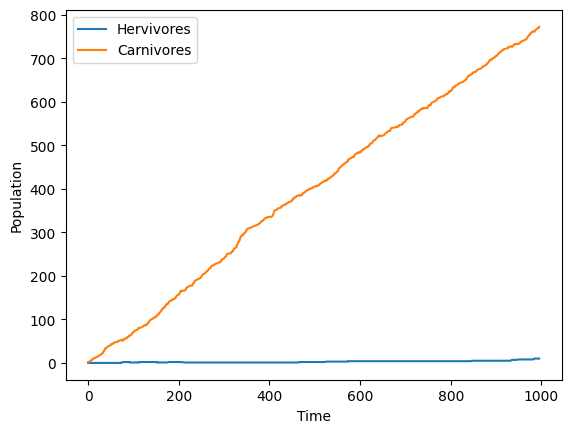

In [26]:
# Event rates
def get_rate(state, lambda1, lambda2, mu1, mu2, q12, q21):
    """ Return the rate of events for the given state. """

    if state == 1:
        return lambda1 + mu1 + q12
    else:
        return lambda2 + mu2 + q21


def simulate_bisse(lambda1, lambda2, mu1, mu2, q12, q21, initial_state, T):
    """
    Simulate the BiSSE model over time T.
    
    Parameters:
    - lambda1: Speciation rate for state 1
    - lambda2: Speciation rate for state 2
    - mu1: Extinction rate for state 1
    - mu2: Extinction rate for state 2
    - q12: Transition rate from state 1 to state 2
    - q21: Transition rate from state 2 to state 1
    - T: Total simulation time
    - initial_state: Initial state of the system (1 or 2)
    
    Returns:
    - num_hervivores: Number of branches in state 1 (hervivores) after T time
    - num_carnivores: Number of branches in state 2 (carnivores) after T time
    """

    # Track event, time, and populations
    events = []
    
    # Initialize the number of initial branches in each state
    num_hervivores = 1 if initial_state == 1 else 0
    num_carnivores = 1 if initial_state == 2 else 0
    
    # Time tracking
    t = 0

    # Simulation loop
    while t < T:
        # Get the total population size
        total_population = num_hervivores + num_carnivores
        
        # if the total population size is 0, stop the simulation
        if total_population == 0:
            break

        # Determine in which state is the branch which the event happens
        current_state = np.random.choice([1, 2], p=[num_hervivores/total_population, num_carnivores/total_population])
        
        # Get the rate for the state
        rate = get_rate(current_state, lambda1, lambda2, mu1, mu2, q12, q21)
        
        # Time to the next event t += dt
        t += np.random.exponential(1 / rate)
        
        # If we exceed the total simulation time, stop the simulation
        if t >= T:
            break
        
        # Determine the type of event given a random number
        #  if the random number is less than the speciation rate, then a speciation event occurs
        #  if the random number is less than the speciation rate + extinction rate, then an extinction event occurs
        #  otherwise, a transition event occurs
        rand = np.random.rand()
        
        # If state is herivore
        if current_state == 1:
            # Speciation
            if rand < lambda1 / rate:
                num_hervivores += 1
            # Extinction  
            elif rand < (lambda1 + mu1) / rate:
                num_hervivores -= 1
            # Transition to state carnivore
            else:
                num_hervivores -= 1  
                num_carnivores += 1
        # If state is carnivore
        else:
            # Speciation
            if rand < lambda2 / rate:
                num_carnivores += 1  
            # Extinction
            elif rand < (lambda2 + mu2) / rate:
                num_carnivores -= 1  
            # Transition to state hervivore
            else:
                num_carnivores -= 1  
                num_hervivores += 1

        # Save the event
        events.append((t, num_hervivores, num_carnivores))
    
    return num_hervivores, num_carnivores, events

# Rates ( BIASED: better for Carnivores )
lambda1, lambda2 = 0.2, 0.8  # Speciation rates
mu1, mu2 = 0.08, 0.02        # Extinction rates
q12, q21 = 0.05, 0.01        # Transition rates

# Total simulation time
T = 1000

# Initial state of the first branch ( carnivore )
initial_state = 2

# Simulate the BiSSE model
num_hervivores, num_carnivores, events = simulate_bisse(lambda1, lambda2, mu1, mu2, q12, q21, initial_state, T)
print(f"Number of hervivores (state 1): {num_hervivores}")
print(f"Number of carnivores (state 2): {num_carnivores}")

# Plot events
events = np.array(events)
plt.plot(events[:, 0], events[:, 1], label='Hervivores')
plt.plot(events[:, 0], events[:, 2], label='Carnivores')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()



Now, we'll split this in 3 classes, each class is different values for the rates and transition probabilities. 
- Class 0: Hervibores are more likely to speciate and carnivores are more likely to go extinct.
- Class 1: Carnivores are more likely to speciate and herbivores are more likely to go extinct.
- Class 3: Both herbivores and carnivores have the same rates for speciation and extinction.

Using this 3 sets of parameters we'll generate our dataset, we'll sample 20000 trees each, and store them labeled with the parameters used to generate them.

In [25]:
# Parameters for each class
#         lb1, lb2, mu1,  mu2,  q12,  q21, initial branch state
class0 = (0.2, 0.8, 0.08, 0.02, 0.05, 0.01, 2) # Carnivores are more prone to reproduce and to not die, more chances to pass from carnivores to hervivores, initial state is carnivore
class1 = (0.8, 0.2, 0.02, 0.08, 0.01, 0.05, 1) # Herbivores are more prone to reproduce and to not die, more chances to pass from hervivores to carnivores, initial state is hervivore
class2 = (0.5, 0.5, 0.05, 0.05, 0.02, 0.02, 1) # Both species have the same rates, equal chances to pass from one state to the other, initial state is hervivore

# Time parameter for the simulation
T = 1000

# Number of simulations per class
num_simulations = 20000

# Classes
classes = [class0, class1, class2]

# Define the dataset as an empty list
dataset = []


# Simulate the BiSSE model 200 times for each set of rates
for label in range(len(classes)):
    for i in range(num_simulations):
        # Simulate the BiSSE model
        num_hervivores, num_carnivores, _ = simulate_bisse(*classes[label], T)
        
        # Convert output to a numpy array
        num_hervivores = np.array(num_hervivores)
        num_carnivores = np.array(num_carnivores)
        values = np.array([num_hervivores, num_carnivores])
        data = [values, label]
        
        # Append the values and label to the dataset
        dataset.append(data)

        # Print every 1k simulations
        if (i + 1) % 1000 == 0:
            print(f"Class {label}: {i + 1} simulation done out of {num_simulations}")            

# Convert dataset to a numpy array
dataset = np.array(dataset, dtype=object)

# Shuffle the dataset
np.random.shuffle(dataset)

# Show shape
print(dataset.shape)

# Split the dataset into training and testing sets
split = int(0.8 * len(dataset))
train_set = dataset[:split]
test_set = dataset[split:]

print(f"Training set shape: {train_set.shape}")
print(f"Testing set shape: {test_set.shape}")

Class 0: 1000 simulation done out of 20000
Class 0: 2000 simulation done out of 20000
Class 0: 3000 simulation done out of 20000
Class 0: 4000 simulation done out of 20000
Class 0: 5000 simulation done out of 20000
Class 0: 6000 simulation done out of 20000
Class 0: 7000 simulation done out of 20000
Class 0: 8000 simulation done out of 20000
Class 0: 9000 simulation done out of 20000
Class 0: 10000 simulation done out of 20000
Class 0: 11000 simulation done out of 20000
Class 0: 12000 simulation done out of 20000
Class 0: 13000 simulation done out of 20000
Class 0: 14000 simulation done out of 20000
Class 0: 15000 simulation done out of 20000
Class 0: 16000 simulation done out of 20000
Class 0: 17000 simulation done out of 20000
Class 0: 18000 simulation done out of 20000
Class 0: 19000 simulation done out of 20000
Class 0: 20000 simulation done out of 20000
Class 1: 1000 simulation done out of 20000
Class 1: 2000 simulation done out of 20000
Class 1: 3000 simulation done out of 20000


Lets confirm that the parameters are correct by simulating a tree with the parameters of each class.

Number of hervivores (state 1): 12
Number of carnivores (state 2): 738


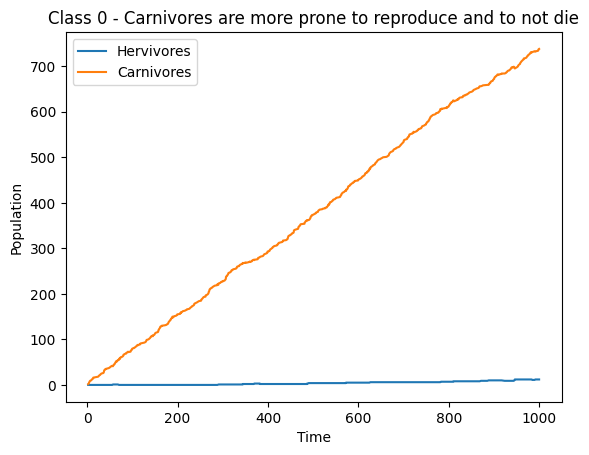

In [28]:
# Simulate the BiSSE model
num_hervivores, num_carnivores, events = simulate_bisse(*class0, T)
print(f"Number of hervivores (state 1): {num_hervivores}")
print(f"Number of carnivores (state 2): {num_carnivores}")

# Plot events
events = np.array(events)
plt.plot(events[:, 0], events[:, 1], label='Hervivores')
plt.plot(events[:, 0], events[:, 2], label='Carnivores')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title("Class 0 - Carnivores are more prone to reproduce and to not die")
plt.legend()
plt.show()

Number of hervivores (state 1): 784
Number of carnivores (state 2): 13


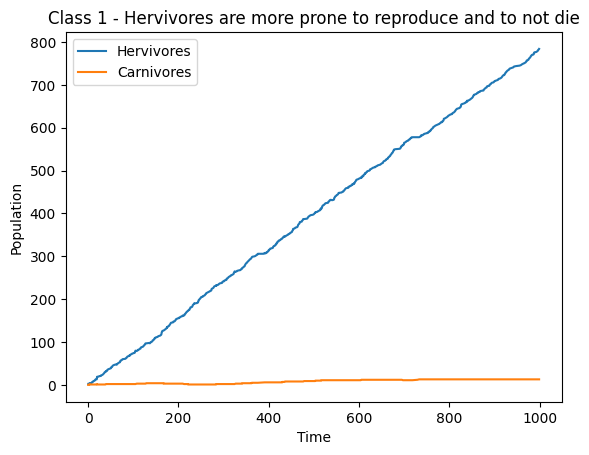

In [29]:
# Simulate the BiSSE model
num_hervivores, num_carnivores, events = simulate_bisse(*class1, T)
print(f"Number of hervivores (state 1): {num_hervivores}")
print(f"Number of carnivores (state 2): {num_carnivores}")

# Plot events
events = np.array(events)
plt.plot(events[:, 0], events[:, 1], label='Hervivores')
plt.plot(events[:, 0], events[:, 2], label='Carnivores')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title("Class 1 - Hervivores are more prone to reproduce and to not die")
plt.legend()
plt.show()

Number of hervivores (state 1): 249
Number of carnivores (state 2): 162


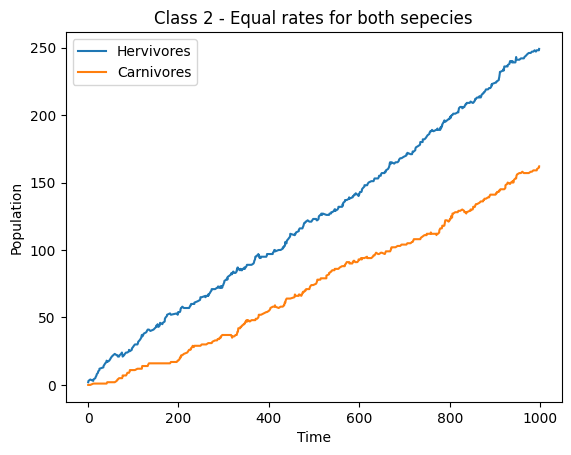

In [21]:
# Simulate the BiSSE model
num_hervivores, num_carnivores, events = simulate_bisse(*class2, T)
print(f"Number of hervivores (state 1): {num_hervivores}")
print(f"Number of carnivores (state 2): {num_carnivores}")

# Plot events
events = np.array(events)
plt.plot(events[:, 0], events[:, 1], label='Hervivores')
plt.plot(events[:, 0], events[:, 2], label='Carnivores')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Class 2 - Equal rates for both sepecies')
plt.legend()
plt.show()

Now, lets see what the data looks like, this will help us visualize our dataset, and also we should get something similar to the following graph in regards to clasification ( same color distribution for each class ).

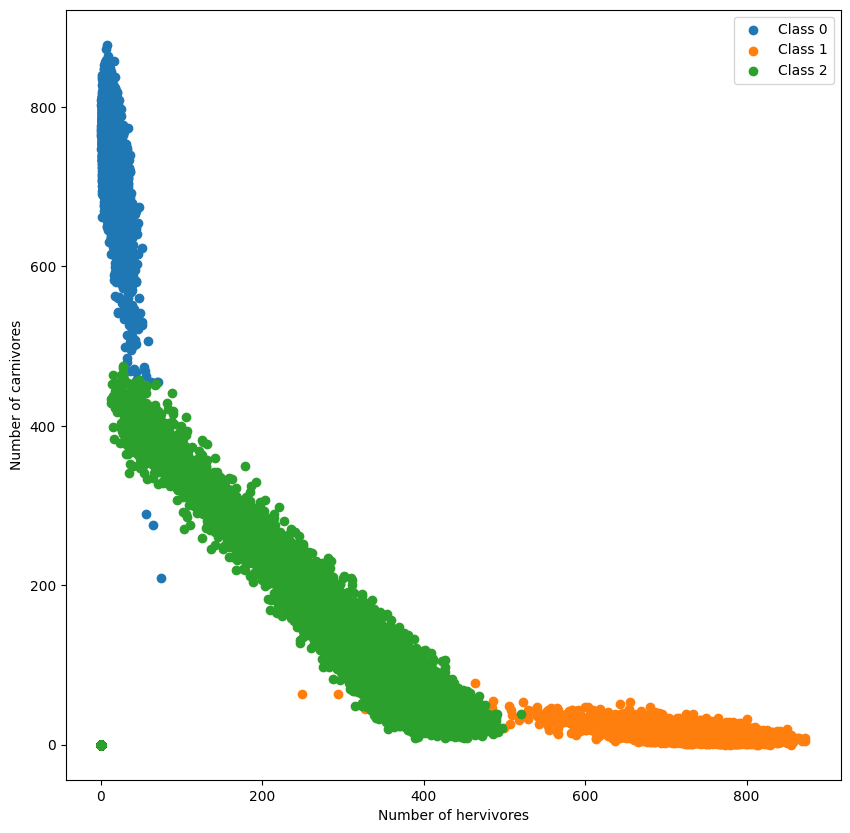

In [14]:
# Print the dataset on a plot
plt.figure(figsize=(10, 10))
for i in range(len(classes)):
    data = dataset[dataset[:, 1] == i][:, 0]
    data = np.array([d for d in data])
    plt.scatter(data[:, 0], data[:, 1], label=f'Class {i}')
plt.xlabel('Number of hervivores')
plt.ylabel('Number of carnivores')
plt.title('BiSSE dataset')
plt.legend()
plt.show()

Now, we'll preprocess the data into batches and we'll define the **Neural Network** that will be used to predict the parameters of the tree, we'll use ADAM optomizer and mean square error as our loss function, and we'll also specify that we also want to show the accuracy metric during trainig.


We tried different configurations for the network and we found the the following has the best size/accuracy ratio:
- Input Layer: 2 nodes, representing the herbivores and carnivores counts.
- Hidden Layer 1: 12 nodes, using the ReLU activation function.
- Hidden Layer 2: 12 nodes, using the ReLU activation function.
- Hidden Layer 3: 6 nodes, using the ReLU activation function.
- Output Layer: 3 nodes, representing the class parameters of the tree used to generate the data.

<img src="https://i.imgur.com/aSvua9F.png" />

We decided to go with this choice of architecture because it's a simple model that should be able to capture the patterns in the data, and it's also a small model that should be able to train quickly.

Finally, we'll train the Neural Network using the trees generated and evaluate the performance of the model by comparing the predicted parameters to the true parameters used in the simulations.

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.7566 - loss: 422.9372 - val_accuracy: 0.9549 - val_loss: 0.0492
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.9619 - loss: 0.0408 - val_accuracy: 0.9625 - val_loss: 0.0271
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.9681 - loss: 0.0270 - val_accuracy: 0.9672 - val_loss: 0.0261
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.9696 - loss: 0.0280 - val_accuracy: 0.9694 - val_loss: 0.0411
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.9692 - loss: 0.0328 - val_accuracy: 0.9707 - val_loss: 0.0262
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.9718 - loss: 0.0362 - val_accuracy: 0.9736 - val_loss: 0.0341
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.9689 - loss: 0.0383 - val_accuracy: 0.9744 - val_loss: 0.0226
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.9497

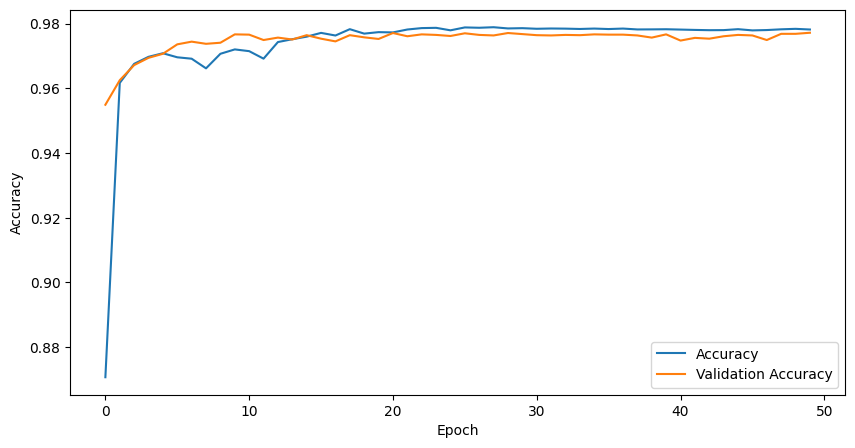

In [20]:
# Split into values and labels ( X and y )
train_x, train_y = train_set[:, 0], train_set[:, 1]
test_x, test_y = test_set[:, 0], test_set[:, 1]

# Flattten and convert to float
train_x = np.vstack(train_x).astype(np.float32)
test_x = np.vstack(test_x).astype(np.float32)

# Convert labels to numpy integers
train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)

# Convert labels to one-hot encoding: class 0 = [1, 0, 0], class 1 = [0, 1, 0], class 2 = [0, 0, 1]
train_y = tf.one_hot(train_y, 3)
test_y = tf.one_hot(test_y, 3)

# Calculate the number of full batches
batch_size = 32
num_train_batches = len(train_x) // batch_size
num_test_batches = len(test_x) // batch_size

# Trim the datasets to have only full batches
train_x = train_x[:num_train_batches * batch_size]
train_y = train_y[:num_train_batches * batch_size]
test_x = test_x[:num_test_batches * batch_size]
test_y = test_y[:num_test_batches * batch_size]

# Build the model as mentioned
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(train_x.shape[1:]), # Shape is (2,)
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(3)  # 3 output units for the one-hot encoding
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=50, batch_size=32, validation_data=(test_x, test_y))

# Plot the training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.9768 - loss: 0.0154
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step
Test accuracy: 0.9771666526794434
Correct predictions: 11726 / 12000


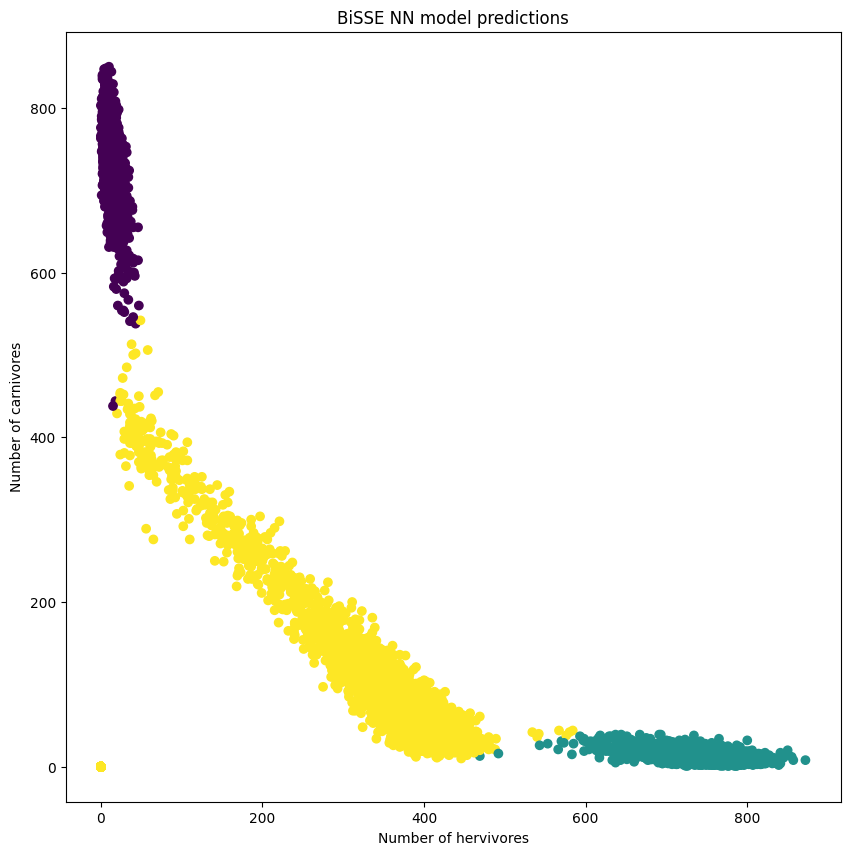

In [21]:
# Evaluate the model and plot the results
loss, accuracy = model.evaluate(test_x, test_y)

# Predict the test set
predictions = model.predict(test_x)

# Get the predicted classes, we use argmax because the input is one-hot encoded
predictions = np.argmax(predictions, axis=1)

# Print number of correct predictions and total number of predictions
print(f"Test accuracy: {accuracy}")
print(f"Correct predictions: {np.sum(predictions == np.argmax(test_y, axis=1))} / {len(test_y)}")

# Plot the results
plt.figure(figsize=(10, 10))
plt.scatter(test_x[:, 0], test_x[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Number of hervivores')
plt.ylabel('Number of carnivores')
plt.title('BiSSE NN model predictions')
plt.show()

From the results we can see that the model is able to predict the parameters with a high degree of accuracy, and the loss function is decreasing over time, which indicates that the model is learning the patterns in the data.

We also plotted the predictions, and we can see that the output predictions fit the classes that we defined with specific tree parameters (better for carnivores, better for hervivores, equals), which indicates that the model is able to capture the patterns in the data.